Precision and recall is evaluated for all of our callers applied to our BAM files from the common sample.  The results are compared to those obtained by MosaicForecast caller applied to other BAM file from the common sample. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import attila_utils
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
from IPython.display import set_matplotlib_formats

In [2]:
import precrecall_vcf as prvcf
import pandas as pd
import seaborn

## 5 callers on Chess BAMs

In [3]:
somvar = prvcf.process_yifans_table('/home/attila/projects/bsm/bsm-network/all_validations_190309_yifan.txt')
regions = somvar[['#CHROM', 'POS']]

In [4]:
results = prvcf.prec_recall_all(callers=['lofreqSomatic', 'somaticSniper', 'strelka2Germline', 'strelka2Somatic', 'Tnseq'], callsetdir='/big/results/bsm/2018-02-22-ref-tissue-proj-testdata/wgs/vcf/snvs/')
results['caller'] = [y.replace('Tnseq', 'MuTect2') for y in results['caller']]

In [5]:
results

,caller,PASS_filter,n_variants,n_calls,n_truecalls,precision,recall
0,lofreqSomatic,True,42,1827,0,0,0.000000
0,somaticSniper,True,42,0,0,None,0.000000
0,strelka2Germline,True,42,3803922,2,5.25773e-07,0.047619
0,strelka2Somatic,True,42,3551,0,0,0.000000
0,MuTect2,True,42,5697,2,0.000351062,0.047619
0,lofreqSomatic,False,42,1827,0,0,0.000000
0,somaticSniper,False,42,189955,3,1.57932e-05,0.071429
0,strelka2Germline,False,42,4161183,4,9.61265e-07,0.095238
0,strelka2Somatic,False,42,765198,13,1.69891e-05,0.309524
0,MuTect2,False,42,261270,6,2.29647e-05,0.142857


['named-figure/prec-recall-common-sample.png',
 'named-figure/prec-recall-common-sample.pdf']

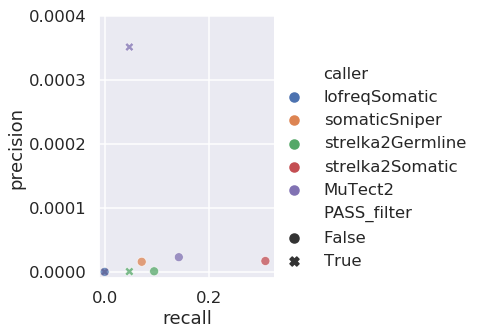

In [6]:
seaborn.set()
seaborn.set_context('talk')
fg = seaborn.relplot(x='recall', y='precision', hue='caller', style='PASS_filter', data=results, alpha=0.75)
fg.axes[0][0].set_ylim(-1e-5, 0.0004)
fg.axes[0][0].set_xlim(-1e-2, )
attila_utils.savefig(fg, 'prec-recall-common-sample')

## Checking input alignment

The input BAMs for the variant calling were generated by Peter Park's group.  I realigned our common sample reads and to generate new BAMs to exclude the possibility that the low performance of our callers is due to wrong input BAMs.  The new alignments were smaller (roughly half the size) than those from the Park group.

But looking at the alignment itself with `samtools tview` and `samtools view` showed that the new and old alignments are nearly indentical besides differences in annotations (metadata).

In [7]:
%%bash
cat /big/results/bsm/2019-08-02-common-sample-new-alignment/whats-in-bams.out

Common_7_NeuN_DO16090243-final-all-wgs.bam
ST-E00192:299:HW3C2CCXX:1:2108:1539:70996
147
1
999853
60
150M
=
999658
-345
CCCCCACGGCCGGATGAGAAGTGGGAGACGGGGAGCGTTTTGACACCCTCGGAGACCCGGTGTAGCAGGAAGAGCCCATTGATGGGGAAGGTGGGGGCGGTTGTGCACCTCAAGCAGGTAAAAGCCCCTCCACAGGCACCAGGGCCGTGN
:*<<-08>9':?@@>@@><>?>?=>1;/&=?==@>6=>??@4.=.???@9>???;??9>>@>????@>??=::?>????@??@>>>???>>@>>>>?9>>?@>@?????@?>@??=>>?>>>?>>>>>?>>>>?=>>>>>?==>?7<<=#
MC:Z:150M
BD:Z:IIIKMPNSQMMLOMNLLKLMILIKKLOLKHHJJOLJKCCJLNIHLINKLJJJKNLIJJMHHLMONNMJJKKJONIKKJJLMKKHHJJKMMHKHHHOLJMKJHHNNHLNKNKKONNMMLKCCKONIINKIKHINMONIMLOOJRQNOHIII
MD:Z:149G0
BI:Z:KKKLPROTUPNNQPQMONNQLNKLLNPNKJJLLRNLMFFMOPLLPLNMNJKKMOOKLJNJKMOQOPNKLLMKQPKLMLLNNMLIIKLLNNJLIIIOMJNLLKJPOKNNLNMKPNOMMLMEEKPOJJMLKKJJONOOKOLPOJPRNMJKKK
NM:i:1
MQ:i:60
AS:i:149
XS:i:0
RG:Z:HW3C2CCXX_L1-43AEAD7C
PG:Z:MarkDuplicates-79A979C3


Common_7_NeuN.bam
ST-E00192:299:HW3C2CCXX:1:2108:1539:70996
147
1
999853
60
150M
=
999658
-345
CCCCCACGGCCGGATGAGAAGTGGGAGACGGGGAGCGTTTTGACACCCTCGGAGACCCGGT

The performance thus remained low with the new alignment used as input.

In [8]:
results_new = prvcf.prec_recall_all(callers=['somaticSniper', 'strelka2Somatic'], callsetdir='/big/results/bsm/2019-08-02-common-sample-new-alignment/snvs/')

In [9]:
results_new

,caller,PASS_filter,n_variants,n_calls,n_truecalls,precision,recall
0,somaticSniper,True,42,0,0,None,0.000000
0,strelka2Somatic,True,42,52352,3,5.73044e-05,0.071429
0,somaticSniper,False,42,365637,2,5.46991e-06,0.047619
0,strelka2Somatic,False,42,2045868,17,8.30943e-06,0.404762


## MosaicForecast on Walsh and Vaccarino BAMs

Email from "Dou, Yanmei" <Yanmei_Dou@hms.harvard.edu> from Jul 11, 2019, 6:31 PM, who is the developer of [MosaicForecast](https://github.com/parklab/MosaicForecast).

> I extracted features for the 400 sites from the Vaccarino (250x bam) and predicted 40/42 TP mosaics with 82% validation rate; and called 26 true mosaics from Walsh bam (200x) with 72% validation rate.

Later (Jul 16, 2019, 8:00 PM) Yanmei disambiguates validation rate, which turns out to be precision:

> Validation rate is defined as TP/(TP+FP), and recall is defined as TP/number_of_true_mosaics (there are in total 42 true mosaics in BSM collection).

In [10]:
results_mfc = pd.DataFrame({'caller': ['MosaicForecast', 'MosaicForecast_Walsh_data', 'MosaicForecast_Vaccarino_data'], 'PASS_filter': True, 'n_variants': 42, 'n_calls': [19, round(26/0.72)
, round(40 / 0.82)], 'n_truecalls': [9, 26, 40], 'precision': [9 / 19, 0.72, 0.82], 'recall': [9 / 42, 26/42, 40/42]}, index=[0, 1, 2])
results_mfc

,caller,PASS_filter,n_variants,n_calls,n_truecalls,precision,recall
0,MosaicForecast,True,42,19,9,0.473684,0.214286
1,MosaicForecast_Walsh_data,True,42,36,26,0.720000,0.619048
2,MosaicForecast_Vaccarino_data,True,42,49,40,0.820000,0.952381


The table (above) and the graph (below) shows that precision is orders of magnitude higher for MosaicForecast (for both the Walsh and Vaccarino BAMs) than for any of our callers for our BAMs.  Recall is also higher for MosaicForecast.

['named-figure/prec-recall-common-sample-mosaicforecast.png',
 'named-figure/prec-recall-common-sample-mosaicforecast.pdf']

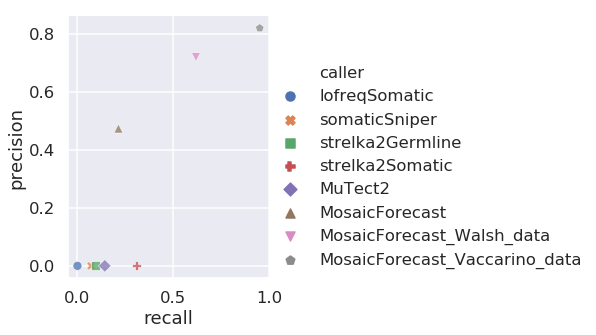

In [11]:
seaborn.set()
seaborn.set_context('talk')
fg = seaborn.relplot(x='recall', y='precision', hue='caller', style='caller', data=pd.concat([results.loc[results['PASS_filter'] == False, :], results_mfc]), alpha=0.75)
attila_utils.savefig(fg, 'prec-recall-common-sample-mosaicforecast')

## Conclusions

1. Our 5 callers recalled only few of the 42 validated somatic variants.  Typically they call thousands to hundreds of thousands of variants even with the PASS filter applied so that the precision for those large callsets tends to be $<10^{-3}$
1. MosaicForecast seems to far outperform any other callers but this must be confirmed by applying MosaicForecast to the same datasets (the BAMs from the Chess lab) as our 5 callers were applied to.

In [12]:
%connect_info

{
  "shell_port": 36281,
  "iopub_port": 40583,
  "stdin_port": 34487,
  "control_port": 60621,
  "hb_port": 35177,
  "ip": "127.0.0.1",
  "key": "b88d62d2-3260b04e5d4ff0955b940121",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-04723daa-e8b5-4d23-91b4-5db252a11aaf.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
